## Task 1: Introduction to Classification
Classification is a type of supervised learning where the goal is to predict a categorical
target variable.

There are two main types of classification problems:

• Binary Classification: Where the target variable has two possible outcomes (e.g.,
yes/no, 0/1).

• Multi-class Classification: Where the target variable has more than two possible
outcomes (e.g., class A, B, and C).

### Dataset Used.

For the Upcoming activities, We will be using the dataset that is downloaded from the following link. The dataset is already available in the Dataset folder

https://github.com/datasciencedojo/datasets/blob/master/titanic.csv






## Task 2: Load the Dataset and Explore the Data

In [2]:

import pandas as pd
import seaborn as sns

# Load Titanic dataset from seaborn
dfo = pd.read_csv("/home/nak/Data-Science-Course-IBA/data/titanic.csv")
dfo.head()


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Task 3: Preprocessing the Data

In [3]:

# Preprocess the Data
df = dfo.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
## 1-HOt Encoding
df = pd.get_dummies(df, columns=['Gender', 'Embarked'])
df.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True


In [5]:
df.isna().sum()

Survived           0
Pclass             0
Age              177
SibSp              0
Parch              0
Fare               0
Gender_female      0
Gender_male        0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipykernel_19369/1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [7]:
df.isna().sum()

Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Gender_female    0
Gender_male      0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

## Task 4: Binary Classification using Logistic Regression

In [8]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']
df.groupby('Survived').sum()


,Pclass,Age,SibSp,Parch,Fare,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S
Survived,,,,,,,,,,
0,1390,16485.50,304,181,12142.7199,81,468,75,47,427
1,667,9675.67,162,159,16551.2294,233,109,93,30,217


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )


In [10]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")

y_pred = model.predict(X_test)


Cross-Validation Accuracy: 0.7867742137969996


## Task 5: Evaluate the Logistic Regression Model

In [11]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f"F1-Score: {accuracy}")


F1-Score: 0.8044692737430168


In [12]:
y_test.value_counts()

Survived
0    110
1     69
Name: count, dtype: int64

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print( cm)

[[98 12]
 [23 46]]


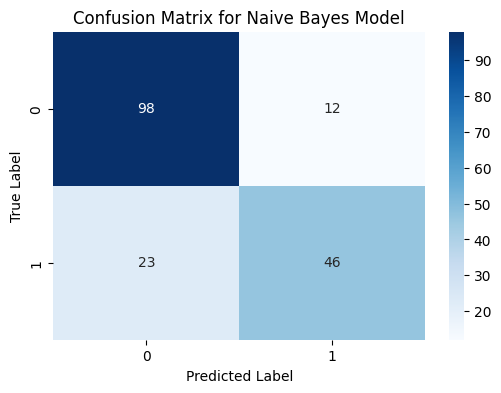

In [14]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-Score : {f1}")

Accuracy : 0.8044692737430168
Precision : 0.7931034482758621
Recall : 0.6666666666666666
F1-Score : 0.7244094488188977


## Task 6: Binary Classification using LDA

In [16]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [18]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf}")
print(f"Precision (Random Forest): {precision_rf}")
print(f"Recall (Random Forest): {recall_rf}")
print(f"F1-Score (Random Forest): {f1_rf}")

Accuracy (Random Forest): 0.8156424581005587
Precision (Random Forest): 0.8
Recall (Random Forest): 0.6956521739130435
F1-Score (Random Forest): 0.7441860465116279


## Task 7: Evaluate the LDA Model

In [19]:

accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)

print(f"Accuracy (LDA): {accuracy_lda}")
print(f"Precision (LDA): {precision_lda}")
print(f"Recall (LDA): {recall_lda}")
print(f"F1-Score (LDA): {f1_lda}")


Accuracy (LDA): 0.8100558659217877
Precision (LDA): 0.7868852459016393
Recall (LDA): 0.6956521739130435
F1-Score (LDA): 0.7384615384615385


## Task 8: Multi-Class Classification using Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
print(len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))

150
120


In [21]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


## Task 9: Evaluate the Naive Bayes Model

In [22]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of NB for Multiclass", accuracy_nb)


Accuracy of NB for Multiclass 1.0


In [23]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


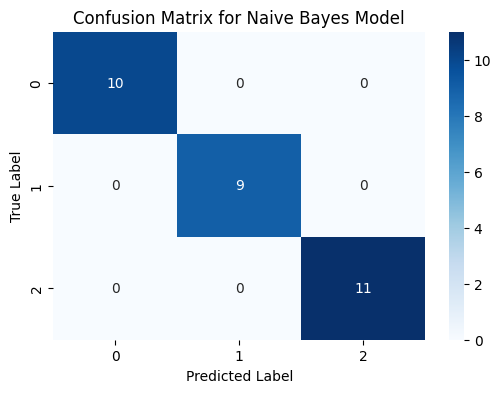

In [24]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()

## Task 10_ Confusion MAtrix and ROC



In [25]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)



[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


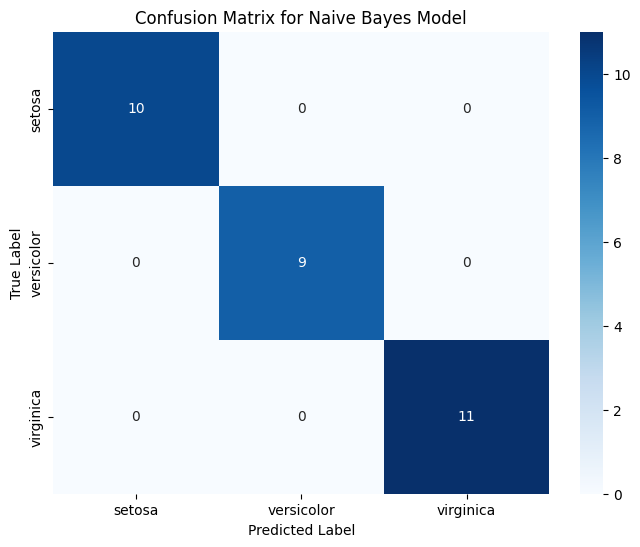

In [26]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:

# # ROC Curve
# fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc="lower right")
# plt.show()

In [29]:
df_iris = pd.read_csv('/home/nak/Data-Science-Course-IBA/data/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")

cv_scores_train = cross_val_score(model, X_train, y_train, cv=5)
cv_scores_test = cross_val_score(model, X_test, y_test, cv=5)
print(f"Training CV Score: {cv_scores_train.mean()}")
print(f"Test CV Score: {cv_scores_test.mean()}")

dt_model = DecisionTreeClassifier()
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print(f"Decision Tree CV Accuracy: {cv_scores_dt.mean()}")

Cross-Validation Accuracy: 0.9733333333333334
Training CV Score: 0.9666666666666666
Test CV Score: 0.9333333333333333
Decision Tree CV Accuracy: 0.9600000000000002


/tmp/ipykernel_19369/4287614981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3.age.fillna(df3.age.mean(), inplace=True)


In [37]:
df3.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64